**Outline**

1. Topic Review
2. Case 1 - New Web Page
3. Case 2 - A micro-mobility service company

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - drawing graph and other visualization

In [1]:
%pip install "https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl"
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.1 MB/s eta 0:00:00


## **Topic Review**
---

From the materials that have been learned in the video learning:

**Data for Comparisons**

- Experiment produces data from two samples that can be used for comparison and inferencing
- Factor is a variable manipulated by the experiment in order to see its effect on subjects in an experiment (ex. dietary plan, workout routine, or discount offered)
- Treatment is a level of a factor chosen by the experimenter in order to see the effect on subjects (ex. two options of dietary plant)
- Randomization is random assignment of subjects to treatments.

**Two-Sample z-test for Proportion**

- Statistics Test
  - Define Null and Alternative Hypothesis
  - Compute two-sample z-test
$$ z = \frac{\hat{p}_1-\hat{p}_2-D_0}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}} $$
  - Make Decision based on alpha and type of test
      - Compare statistics test and critical value
          - One-side, z-test $<$ z-crit ; reject $H_0$
          - One-side, z-test $>$ z-crit ; reject $H_0$
          - Two-side, z-test $>$ z-crit or z-test $<$ -z-crit; reject $H_0$
      - Compare p-value and significance level ($\alpha$)
          - pvalue < $\alpha$ ; reject h0
  
- Confidence Interval of two-sample z-test for proportions. The 100(1-$\alpha$) Confidence interval for two-sample proportion differnce is
$$ p_1-p_2 \pm z_{\alpha/2}\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}$$

### **Two-Sample t-test**

- Statistics Test
  - Define Null and Alternative Hypothesis
  - Compute two-sample t-test if population standard deviation is unknown or either the number of each sample doesn't greater than 30
$$ t = \frac{\bar{x}_1-\bar{x}_2-D_0}{\sqrt{(s_1^2+s_2^2)(\frac{1}{n_1}+\frac{1}{n_2})}} $$
  - Make Decision based on alpha and type of test
      - Compare statistics test and critical value
          - One-tailed (lower), t-test $<$ t-crit ; reject $H_0$
          - One-tailed (greater), t-test $>$ t-crit ; reject $H_0$
          - Two-tailed, z-test $>$ t-crit or t-test $<$ -t-crit; reject $H_0$
      - Compare p-value and significance level ($\alpha$)
          - pvalue  $<\alpha$ ; reject h0
  
- Confidence Interval of two-sample t-test for proportions. The 100(1-$\alpha$) Confidence interval for two-sample proportion differnce is
$$ \bar{x_1}-\bar{x_2} \pm t_{\alpha/2}\sqrt{(s_1^2+s_2^2)(\frac{1}{n_1}+\frac{1}{n_2})}$$

## **Case Study 1 : New Web Page**
___

As a marketer, Andy has developed a new web page in order to try and increase the number of users who decide to pay for the company's product. He tries to compare between the old and new web page and the company will implement this new page if there is a significant positive impact on their product sales. He declare if the new page can give the convertion rate much higher than the old one, he will launch the new page.

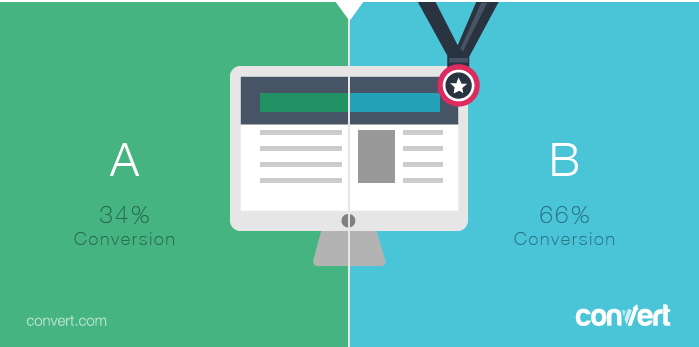

#### **Loading data into Dataframe**

- First, we should take a look at our dataset.
 - We can check the number of observation that experience old web page and the new one
 - Check Missing Value, and handle it if any.
 - Check duplicates, and handle it if any.

In [6]:
csv_path = "ab_test.csv"
df_case1= pd.read_csv(csv_path, delimiter=",")
df_case1.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0.0
1,804228,01:45.2,control,old_page,0.0
2,661590,55:06.2,treatment,new_page,0.0
3,853541,28:03.1,treatment,new_page,0.0
4,864975,52:26.2,control,old_page,1.0


In [7]:
df_case1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87375 entries, 0 to 87374
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         87375 non-null  int64  
 1   time       87374 non-null  object 
 2   con_treat  87374 non-null  object 
 3   page       87374 non-null  object 
 4   converted  87374 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [8]:
df_case1['id'].nunique()

87027

In [9]:
df_case1['con_treat'].value_counts()

,count
con_treat,
treatment,43801
control,43573


In [10]:
pd.crosstab(df_case1['con_treat'], df_case1['page'])

page,new_page,old_page
con_treat,,
control,593,42980
treatment,43195,606


In [11]:
# detecting missing values in the dataset
df_case1.isnull().sum()

,0
id,0
time,1
con_treat,1
page,1
converted,1


- Then, we need to look for the duplicate data. If there is duplicate data, we need to drop it out.

In [12]:
df_case1["id"].duplicated().sum()

348

In [13]:
df_case1[df_case1.id.duplicated()==True]["id"]

,id
2656,698120
2893,773192
7500,899953
8036,790934
10218,633793
...,...
86884,907833
86939,704280
86969,639817
87061,857115


In [14]:
df_case1[df_case1.id==773192]

,id,time,con_treat,page,converted
1899,773192,37:58.8,treatment,new_page,0.0
2893,773192,55:59.6,treatment,new_page,0.0


- Drop duplicate data with same id

In [15]:
df_case1.drop_duplicates(subset="id", inplace=True)

In [16]:
df_case1[df_case1.id==773192]

,id,time,con_treat,page,converted
1899,773192,37:58.8,treatment,new_page,0.0


Now, the result shows that there is no duplicate data in our user_id

In [17]:
df_case1

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0.0
1,804228,01:45.2,control,old_page,0.0
2,661590,55:06.2,treatment,new_page,0.0
3,853541,28:03.1,treatment,new_page,0.0
4,864975,52:26.2,control,old_page,1.0
...,...,...,...,...,...
87370,824125,00:21.9,treatment,new_page,1.0
87371,798952,31:08.2,treatment,new_page,0.0
87372,775041,22:07.0,control,old_page,0.0
87373,810958,07:32.2,treatment,new_page,0.0


In [18]:
df_case1['id'].nunique()

87027

#### **Define Null & Alternate Hypothesis**

- What to prove: **conversion rate** or the proportion of convertion from landing on the **new** page **greater** than the **old** page
- Let $p_1$ is the proportion of convertion from landing on the **new** page and $p_2$ is the proportion of convertion from landing on the **old** page

- Then we state Null hypothesis ($H_0$) as status quo, where we shouldn't do anything and have no data
 - $H_0$: the probability of all users who convert from landing on the new page is **less than or equal** to the probability of all users who convert from landing on the old page.
   $$H_0:P_1 \leq P_2$$
- Alternative hypothesis ($H_1$) is the opposite claim from null hypothesis
 - $H_1$: the probability of all users who convert from landing on the old page is **greater than** the probability of all users who convert from landing on the new page. $$H_1:P_1 > P_2$$
- Set siginificance level (alpha)
 - Significance level = 0.05

 #### **Doing Analysis**

 Before conducting the two-sample z-Test, we need to find the number of successes (convertion) and the number of observations in our data

In [19]:
# The number of successes in observasion
converted_from_old_page_cond = (df_case1['page'] == 'old_page') & (df_case1['converted'] == 1)
converted_from_new_page_cond = (df_case1['page'] == 'new_page') & (df_case1['converted'] == 1)

converted_from_old_page_data = df_case1[converted_from_old_page_cond]
converted_from_new_page_data = df_case1[converted_from_new_page_cond]

converted_old = len(converted_from_old_page_data)
converted_new = len(converted_from_new_page_data)

In [20]:
converted_old

5240

In [21]:
# The number of observations
n_old = len(df_case1[df_case1.page == 'old_page'])
n_new = len(df_case1[df_case1.page == 'new_page'])

- Afterward, we can calculate statistics test and p-value using spicy library.


- There are several steps to calculate two-sample z-test for proportions using statsmodels

1. import library

    - from statsmodels import [proportions_ztest](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html)
    
    
2. Using function`proportions_ztest(count = ... , nobs = ... , alternative = ... )` by replacing parameters  :
    - `count` : number of successes
    - `nobs` : number of observations
    - `alternative` : It depends on the alternative hypothesis for the test
        - if $H_1$ is not equal to certain value, we use `two-sided`
        - if $H_1$ is larger than certain value, we use `larger`
        - if $H_1$ is smaller than certain value, we use `smaller`
        
3. The function will return two output, namely test statistic and p-value.



In [22]:
from statsmodels.stats.proportion import proportions_ztest

In [23]:
# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [converted_new, converted_old],
                                                nobs = [n_new, n_old],
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

The computed Z test statistic is:  -0.5462
The p-value is:  0.7076


- After we know statistic test from our case, the next step we will find critical z-value to compare with statistic test. We use 5% significance level (alpha)

In [24]:
# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


- Afterward, we make decision rules

In [25]:
# Decision rule
if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


# Visualization
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot sample distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1),
         color='blue')

# plot alpha region
x_alpha = np.arange(1.645, 4, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(test_stat, 4, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(test_stat, 4),
            color ="green",
            linestyle = "--",
            label ="z-stat")
plt.axvline(z_crit,
            color ="red",
            linestyle = "--",
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")

plt.title(f'Standard Normal Distribution Plot \n\n z-statistic = {np.round(test_stat, 4)}, z_crit = {np.round(z_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.05');

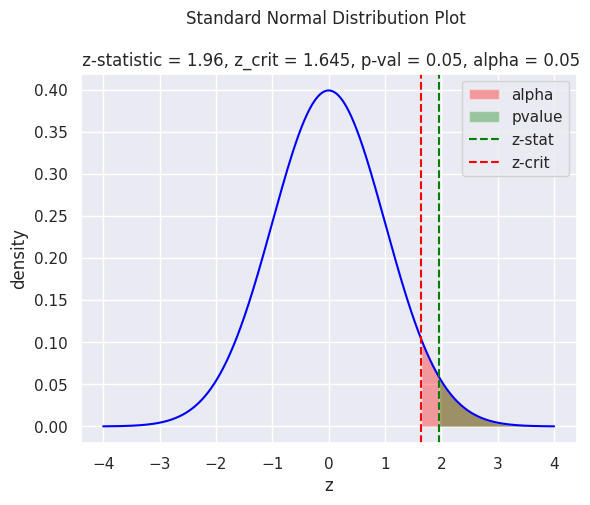

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme()

test_stat = 1.96
z_crit = 1.645
p_value = 0.05

# Plot sample distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='blue')


x_alpha = np.arange(1.645, 4, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x=x_alpha, y1=y_alpha, facecolor='red', alpha=0.35, label='alpha')

# Plot p-value
x_pvalue = np.arange(test_stat, 4, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x=x_pvalue, y1=y_pvalue, facecolor='green', alpha=0.35, label='pvalue')

# Plot z-crit and z-stat
plt.axvline(np.round(test_stat, 4), color="green", linestyle="--", label="z-stat")
plt.axvline(z_crit, color="red", linestyle="--", label="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")

plt.title(f'Standard Normal Distribution Plot \n\n z-statistic = {np.round(test_stat, 4)}, z_crit = {np.round(z_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.05')

plt.show()


- Based on statistic test and p-value, we fail to reject null hypothesis.
   $$H_0:P_1 \leq P_2$$
- It means there's no enough evidence to prove the probability of all users who convert from landing on the new page is **greater than** to the probability of all users who convert from landing on the old page.

After that, we will compute confidence interval to estimate in what range, our proportion difference in population

*   To calculate confidence interval for proportion, we can use [statsmodels.stats.proportion.confint_proportions_2indep](https://https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.confint_proportions_2indep.html)

1. import library
  - import statsmodels.api
  
  
2. Use function `statsmodels.stats.proportion.confint_proportions_2indep(count1, nobs1, count2, nobs2, compare='diff', alpha=0.05)')`

  - `count1, nobs1` = number of successes and number of observation for first sample.
  
  - `count2, nobs2` = number of successes and number of observation for second sample.
  
  - `alpha` = significance level
  
  - `compare` = what type of comparison used
      - `diff` if you find confidence interval of $p_1-p_2$
      - `ratio` if you find confidence interval of $\frac{p_1}{p_2}$
      - `odds-ratio` confidence interval = $\frac{\frac{p_1}{1-p_1}}{\frac{p_2}{1-p_2}}$

3. The function will return lower and upper limits of the confidence interval


In [28]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = converted_old, nobs1 = n_old,
                                                 count2 = converted_new, nobs2 = n_new,
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(-0.0031162794252666956, 0.00552479114674088)


### Conclusion
- As the p value > alpha(0.05) , we fail to reject $H_0$.
- Therefore, from the data we can say that we can't reject if the probability of all users who convert from landing on the new page is **less than or equal** to the probability of all users who convert from landing on the old page.

- Confidence interval lies between -0.0008 and 0.0039, it means that we are 95% confidence that the new page will attract users to buy company's product by -0.08% to 0.39% rather than the old page

Recommendation for business:
- The company shouldn't use the new page

## **Case Study 2:** A micro-mobility service company
___

A micro-mobility service company offers unique vehicles for the daily commute, and it has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to check if working day has an effect on the number of electric cycles rented

#### **Loading data into Dataframe**

First of all, we should take a look at our dataset.
 - We can check the number of observation that experience old web page and the new one
 - Check Missing Value, and handle it if any
 - Check duplicates, and handle it





In [32]:
csv_path = "london_merged.csv"
df = pd.read_csv(csv_path, delimiter=",")

In [33]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [35]:
# no of rows amd columns in dataset
print(f" rows: {df.shape[0]} \n columns: {df.shape[1]}")

 rows: 17414 
 columns: 10


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [37]:
# detecting missing values in the dataset
df.isnull().sum()

,0
timestamp,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0


In [38]:
df.duplicated().sum()

0

Based on the result, there are no missing value and duplicate data in dataset.
#### **Define Null & Alternate Hypothesis**
First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: The bike's renting in working days and non- working days are equal.
$$ H_0:\mu_A = \mu_B $$

$H_1$: The bike's renting cnt in working days and non- working days are not equal.
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

#### **Preanalysis**

Count the number of bike sharing in weekend vs holidays


In [39]:
df.groupby('is_weekend')["cnt"].sum()

,cnt
is_weekend,
0.0,15048216
1.0,4857756


- `cnt` = Count of bikes rent
- Count for bikes rentied in working day is much higher than non working day.
- During is_holidays, people don't prefer to ride bikes.

#### **Doing Analysis**

- Although we have large samples (both samples have more than 30 observations), we don't know about the population standard deviation ($\sigma$), so we use t-test instead of z-test
- Before conducting the two-sample t-test we need to find if the given data groups have the same variance.



In [40]:
import numpy as np

# bike rent on weekdays
data_group1 = df[df['is_weekend']==0]['cnt'].values

# bike rent on weekend
data_group2 = df[df['is_weekend']==1]['cnt'].values

# variance
np.var(data_group1), np.var(data_group2)

(1290476.528935804, 855832.2231742163)

In [42]:
from scipy import stats
result = stats.ttest_ind(a = data_group1,
                         b = data_group2,
                         equal_var=False,
                         alternative = "greater")

In [43]:
result.pvalue

3.3068717689464655e-44

In [44]:
result.statistic

13.957662137429354

The next step is to make decision rules by which we can know our hypothesis will be either rejected or fail to reject.

In [45]:

if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [46]:
df_data = len(data_group1)+len(data_group2)-2
df_data

17412

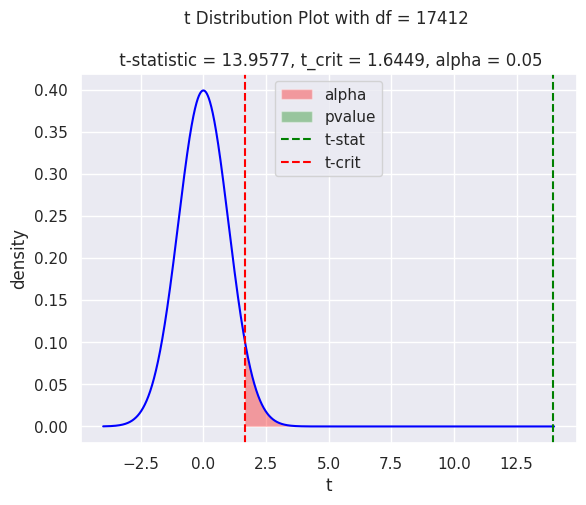

In [48]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');



*   To calculate confidence interval for the difference in means, we can use CompareMeans
1. import library
  - from statsmodels.stats.weightstats import DescrStatsW,[CompareMeans](https://https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.tconfint_diff.html#statsmodels.stats.weightstats.CompareMeans.tconfint_diff)
2. Use function `CompareMeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')`

  `alpha` = significance level for the confidence interval

  `alternative` = It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to value, we use `two-sided`
    - if $H_1$ is larger than value, we use `larger`
    - if $H_1$ is smaller than value, we use `smaller`
  
  `usevar` = ‘pooled’ or ‘unequal’
  - `pooled` indicates that the standard deviation of the samples is assumed to be the same.
  - `unequal` shows that Welch ttest with Satterthwait degrees of freedom is used.
3. The function will return lower and upper limits of the confidence interval


In [49]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_group1),
                  d2 = DescrStatsW(data=data_group2))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 199.29745687829114 264.42081727967496 ]


Based on the result, we can 95% confident that the average difference the bike's renting in working days and non working days lies between 199.3 and 265.42.

### Conclusion
- As the p value < alpha(0.05) , we reject $H_0$. Therefore, we can say that the count of renting bikes in both working and non-working days is not equal.

- As confidence interval lies between 199.3 and 265.42, there is significant different between the bike's renting in working days and non-working days. Therefore, we can say that renting of bikes in working days are greater than weekend

References :
1. https://www.kaggle.com/datasets/ahmedmohameddawoud/ecommerce-ab-testing
2. https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset